In [1]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = (5, 3) # set default figure size
import flopy as fp  # import flopy and call it fp
import glob
import imageio
import IPython
import datetime
import xarray as xr

### run varrying parameters in `vary_params.py` 
#### vary K & porosity

In [2]:
files = glob.glob(r'output/model_output_2024-02-01 19*.txt')
load_arr = np.loadtxt(files[-1],delimiter=",")
print(f'using latest {files[-1]}')
# correct_arr = np.array([load_arr[:,0], load_arr[:,2],load_arr[:,4]]).T
# load_arr = correct_arr

using latest output\model_output_2024-02-01 19_24.txt


In [3]:
load_arr

array([[27.09677419, 31.12903226, 33.70967742, 35.80645161, 37.58064516,
        39.19354839, 40.64516129, 41.93548387, 43.06451613, 44.19354839],
       [21.93548387, 25.96774194, 29.19354839, 31.77419355, 34.03225806,
        35.96774194, 37.74193548, 39.35483871, 40.80645161, 41.93548387],
       [15.64516129, 20.32258065, 24.35483871, 27.58064516, 30.32258065,
        32.74193548, 34.83870968, 36.77419355, 38.5483871 , 40.        ],
       [ 6.93548387,  7.41935484,  7.90322581,  8.22580645,  8.70967742,
         9.03225806,  9.35483871,  9.67741935, 10.        , 10.32258065],
       [ 5.        ,  5.48387097,  5.96774194,  6.4516129 ,  6.77419355,
         7.09677419,  7.41935484,  7.74193548,  8.06451613,  8.38709677],
       [ 3.06451613,  3.5483871 ,  4.03225806,  4.35483871,  4.67741935,
         5.        ,  5.32258065,  5.64516129,  5.96774194,  6.29032258],
       [ 3.06451613,  3.22580645,  3.22580645,  3.38709677,  3.38709677,
         3.5483871 ,  3.5483871 ,  3.5483871 

In [4]:
# files = glob.glob(r'output/parameter_output_2024-01-08*.txt')
files = glob.glob(r'output/parameter_output_2024-02-01 19*.txt')
load_params = np.loadtxt(files[-1],delimiter=",")
n_kh_vals = 3
kh_var = load_params[:n_kh_vals]
npor_var = load_params[n_kh_vals:]

In [5]:
kh_var

array([10., 25., 40.])

In [6]:
npor_var

array([0.5 , 0.35, 0.2 ])

In [7]:
Q_d = 40_000 # m^3/y
Q_tot = Q_d * 1
n_years = 10
cycle_n = np.arange(0, n_years,1)
cycle_n_arr = np.array(cycle_n) + 1

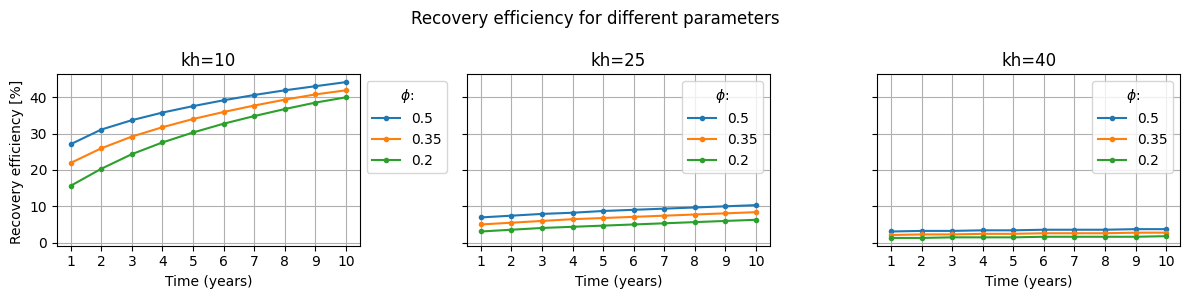

In [8]:
n = 0
fname = r'figures/recovery_Q_vary_k_npor.png'
fig, ax = plt.subplots(1,3,figsize=(12,3),sharey=True, sharex=True)
fig.suptitle("Recovery efficiency for different parameters")
axs = ax.flatten()
for i in range(len(kh_var)):
    # axs[i].axhline(Q_d,ls="--",color="k",label="$V_d$")
    if i in [0]: axs[i].set_ylabel("Recovery efficiency [%] ")
    if i in [0,1,2]: axs[i].set_xlabel(r"Time (years)")
    axs[i].set_title(f"kh={int(kh_var[i])}")
    axs[i].set_xticks(ticks=cycle_n_arr)
    axs[i].grid()
    cycle_n_arr = np.array(cycle_n) + 1
    for j in range(len(npor_var)):
        axs[i].plot(cycle_n_arr,load_arr[n,:],marker=".",label=f"{npor_var[j]}")
        axs[i].legend(bbox_to_anchor=(1,1),title=r"$\phi$:")
        n+=1
fig.tight_layout()
plt.savefig(fname,bbox_inches="tight")
    # plt.close()

# repeat closer to 10

In [9]:
files = glob.glob(r'output/model_output_2024-02-02 11*.txt')
load_arr = np.loadtxt(files[-1],delimiter=",")
print(f'using latest {files[-1]}')

using latest output\model_output_2024-02-02 11_14.txt


In [10]:
# files = glob.glob(r'output/parameter_output_2024-01-08*.txt')
files = glob.glob(r'output/parameter_output_2024-02-02 11*.txt')
load_params = np.loadtxt(files[-1],delimiter=",")
n_kh_vals = 3
kh_var = load_params[:n_kh_vals]
npor_var = load_params[n_kh_vals:]

In [11]:
kh_var

array([20., 15., 10.])

In [12]:
npor_var

array([0.5 , 0.35, 0.2 ])

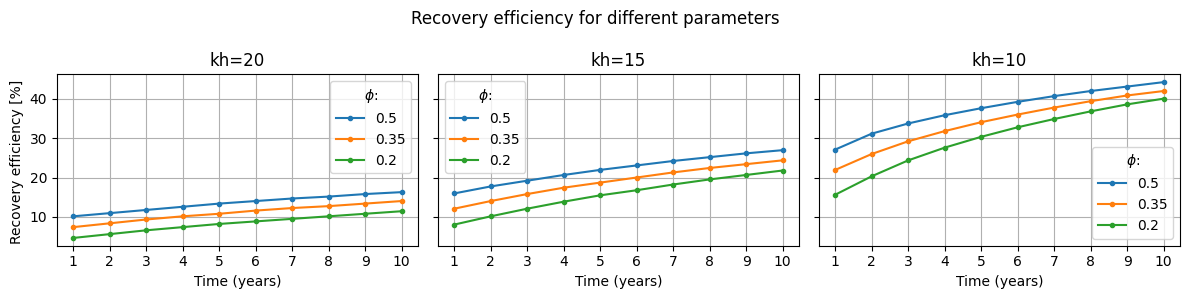

In [13]:
n = 0
fname = r'figures/recovery_Q_vary_k_npor_smaller.png'
fig, ax = plt.subplots(1,3,figsize=(12,3),sharey=True, sharex=True)
fig.suptitle("Recovery efficiency for different parameters")
axs = ax.flatten()
for i in range(len(kh_var)):
    # axs[i].axhline(Q_d,ls="--",color="k",label="$V_d$")
    if i in [0]: axs[i].set_ylabel("Recovery efficiency [%] ")
    if i in [0,1,2]: axs[i].set_xlabel(r"Time (years)")
    axs[i].set_title(f"kh={int(kh_var[i])}")
    axs[i].set_xticks(ticks=cycle_n_arr)
    axs[i].grid()
    cycle_n_arr = np.array(cycle_n) + 1
    for j in range(len(npor_var)):
        axs[i].plot(cycle_n_arr,load_arr[n,:],marker=".",label=f"{npor_var[j]}")
        axs[i].legend(title=r"$\phi$:")
        n+=1
fig.tight_layout()
plt.savefig(fname,bbox_inches="tight")
    # plt.close()

#### vary alpha_L

In [14]:
files = glob.glob(r'output/model_alpha_output_2024-02-01*.txt')
load_arr = np.loadtxt(files[-1],delimiter=",")
print(f'using latest {files[-1]}')
load_arr[0,:]

using latest output\model_alpha_output_2024-02-01 22_46.txt


array([27.09677419, 31.12903226, 33.70967742, 35.80645161, 37.58064516,
       39.19354839, 40.64516129, 41.93548387, 43.06451613, 44.19354839])

In [15]:
files = glob.glob(r'output/parameter_alpha_output_2024-02-01*.txt')
load_params = np.loadtxt(files[-1],delimiter=",")
alphaL_var = load_params[:]
alphaL_var

array([0.5 , 1.25, 2.  ])

In [16]:
Q_d = 40_000 # m^3/y
Q_tot = Q_d * 1.25
cycle_n = np.arange(0, 10,1)
cycle_n_arr = np.array(cycle_n) + 1

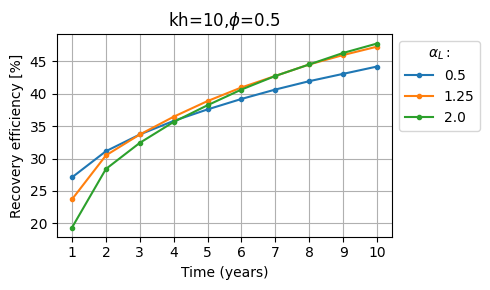

In [17]:
n = 0
fname = r'figures/recovery_Q_vary_alpha_L.png'
fig, ax = plt.subplots(1,figsize=(5,3),sharey=True, sharex=True)
# fig.suptitle("Recovery volume for different parameters")
axs = [ax]
i = 0
axs[i].set_ylabel("Recovery efficiency [%]")
axs[i].set_xlabel(r"Time (years)")
axs[i].set_title(fr"kh=10,$\phi$=0.5")
axs[i].set_xticks(ticks=cycle_n_arr)
axs[i].grid()
for j in range(len(alphaL_var)):
    cycle_n_arr = np.array(cycle_n) + 1
    axs[i].plot(cycle_n_arr,load_arr[n,:],marker=".",label=f"{alphaL_var[j]}")
    n+=1
axs[i].legend(bbox_to_anchor=(1,1),title=r"$\alpha_L:$")
fig.tight_layout()
plt.savefig(fname,bbox_inches="tight")
    # plt.close()

# Make nice contour plots
These make use of xarray `*.nc` files which are the results of running `vary_params_MP.py` - large data files and thus ommited

In [26]:
k_lst = [10, 25, 40]
npor_lst = [0.2,0.35, 0.5]
params = [[k, npor, 0.5] for k in k_lst for npor in npor_lst]

In [27]:
ds_lst = []
nlay = 20
n_years = 10
for k, npor, alphaL in params:
    fname_in = fr'output/store_concentrations_k-{k}_npor-{npor}_alphaL-{alphaL}-nlay-{nlay}_nyears-{n_years}*.nc'
    files = glob.glob(fname_in)[-1]
    ds_lst.append(xr.open_dataarray(files))

In [28]:
time1 = "2024-02-01 19_48"
time2 = "2024-02-01 19_41"
r_300 = np.loadtxt(fr'output/model_radius_{time1}.txt')
r_200 = np.loadtxt(fr'output/model_radius_{time2}.txt')
zc = np.loadtxt(fr'output/model_z_{time1}.txt')

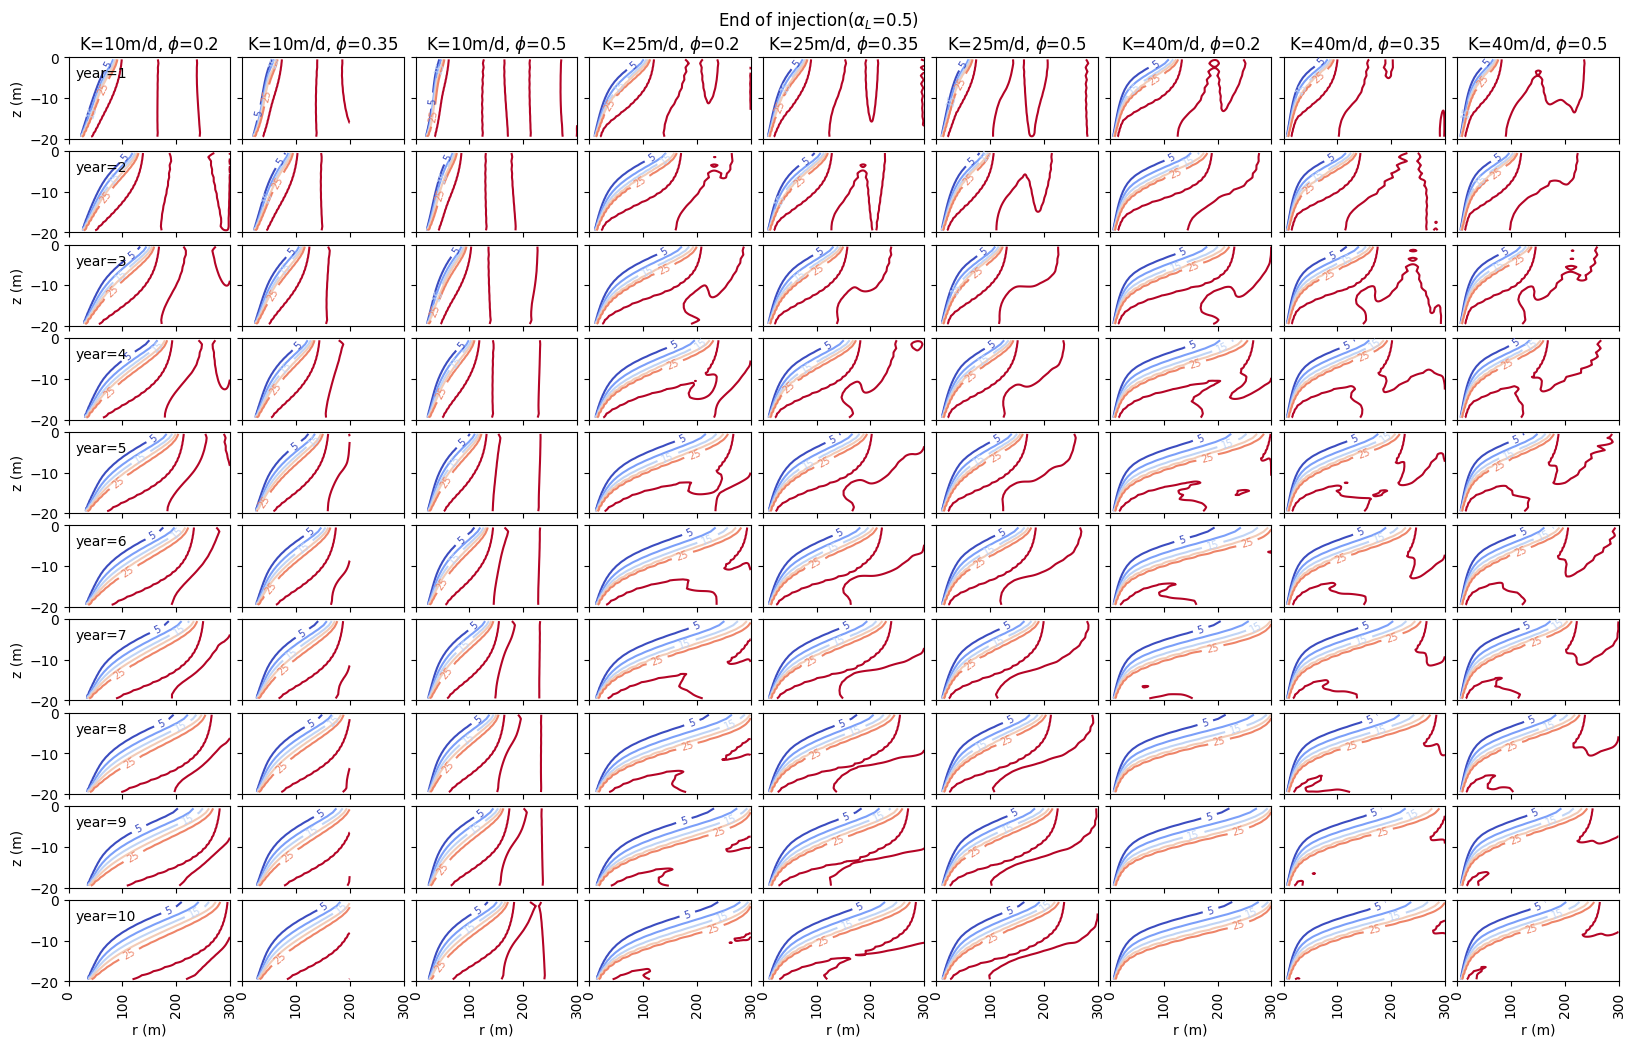

In [62]:
alphaL = 0.5

tstep = 3030
title = f'End of injection'

# 

n_years = 10
years = np.arange(0, n_years, 1)
fig, ax = plt.subplots(n_years, len(ds_lst),figsize=(20,12),sharex=True,sharey=True, gridspec_kw = {'wspace':0.075, 'hspace':0.15})
plt.suptitle(title + rf'($\alpha_L$={alphaL})',y=0.92)
for ds_index, ds in enumerate(ds_lst):
    for year in years:
        if len(ds_lst) > 1: axs = ax[year, ds_index]
        else: axs = ax[year]
        if ds_index == 1: r = r_200
        else: r = r_300
        axs.set_xlim((0, 300))
        axs.set_ylim((-20, 0))
        data = ds.isel(year=year,tstep=tstep)
        cls = axs.contour(r, zc, data, np.arange(5, 35, 5), cmap='coolwarm')
        axs.clabel(cls, cls.levels[::2], inline=True, fontsize=7)
        if year == 9 and ds_index % 2 == 0: axs.set_xlabel("r (m)")
        else: axs.set_xticks([], minor=True)
        if year == 9: axs.set_xticklabels(axs.get_xticklabels(), rotation=90)
        if year % 2 == 0 and ds_index == 0:  axs.set_ylabel("z (m)")
        if year == 0: 
            k,npor, alphaL = params[ds_index][0],params[ds_index][1],params[ds_index][2]
            axs.set_title(fr'K={k}m/d, $\phi$={npor}')
        if ds_index == 0:
            axs.annotate(f'year={year+1}',(12.5,-5))

plt.tight_layout()
plt.savefig(fr'figures/overview_flows_at_{title.replace(' ',"_")}.png',bbox_inches="tight")

In [30]:
from ipywidgets import interact
import warnings
warnings.simplefilter("ignore")
def contour(tstep,year,ds_index):
    ds_in = ds_lst[ds_index]
    data = ds_in.isel(year=year-1,tstep=tstep)
    plt.subplot(111, xlim=(0, 200), ylim=(-20, 0), xlabel='r (m)', ylabel='z (m)')
    cls = plt.contour(r, zc, data, np.arange(5, 35, 5), cmap='coolwarm')
    plt.clabel(cls, cls.levels[::2], inline=True, fontsize=10)
nstepin = 3030
nstepout = 3650-3030
interact(contour, tstep=(0, nstepin + nstepout - 1, 1),year=(1,n_years,1), ds_index=np.arange(len(ds_lst)));

interactive(children=(IntSlider(value=1824, description='tstep', max=3649), IntSlider(value=5, description='ye…

# compare 10 to 20 layers

In [82]:
ds_lst =[]
files = [r"output\store_concentrations_k-30_npor-0.35_alphaL-0.5-nlay-10_2024-01-31 18_04.nc",
        r"output\store_concentrations_k-25_npor-0.35_alphaL-0.5-nlay-20_nyears-10_2024-02-01 15_36.nc"]
for file in files:
    ds_lst.append(xr.open_dataarray(file))
params = [[30, 0.35, 0.5, 10],[25,0.34,0.5,20]]

In [83]:
ds_lst

[<xarray.DataArray (year: 10, tstep: 3650, layer: 10, r: 1000)>
 [365000000 values with dtype=float64]
 Dimensions without coordinates: year, tstep, layer, r,
 <xarray.DataArray (year: 10, tstep: 3650, layer: 20, r: 1500)>
 [1095000000 values with dtype=float64]
 Dimensions without coordinates: year, tstep, layer, r]

In [84]:
z_10 = np.loadtxt(fr'output/model_z_2024-01-31 16_36.txt')
z_20 = np.loadtxt(fr'output/model_z_{time1}.txt')

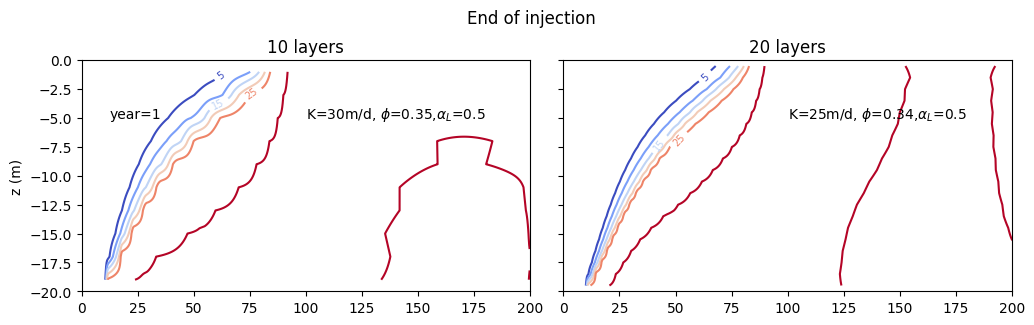

In [103]:
tstep = 3030
title = f'End of injection'

n_years = 1

years = np.arange(0, n_years, 1)
fig, ax = plt.subplots(n_years, len(ds_lst),figsize=(12,3),sharex=True,sharey=True, gridspec_kw = {'wspace':0.075, 'hspace':0.15})
plt.suptitle(title,y=1.05)
for ds_index, ds in enumerate(ds_lst):
    for year in years:
        if len(ds_lst) > 1 and len(years) >1 : axs = ax[year, ds_index]
        if len(ds_lst) <= 1: axs = ax[year]
        if len(years) <= 1: axs = ax[ds_index]
        if ds_index == 0: 
            r = r_200
            zc = z_10
        else: 
            r = r_300
            zc = z_20
        axs.set_xlim((0, 200))
        axs.set_ylim((-20, 0))
        data = ds.isel(year=year,tstep=tstep)
        cls = axs.contour(r, zc, data, np.arange(5, 35, 5), cmap='coolwarm')
        axs.clabel(cls, cls.levels[::2], inline=True, fontsize=7)
        if year == 9 and ds_index % 2 == 0: axs.set_xlabel("r (m)")
        else: axs.set_xticks([], minor=True)
        if year == 9: axs.set_xticklabels(axs.get_xticklabels(), rotation=90)
        if year % 2 == 0 and ds_index == 0:  axs.set_ylabel("z (m)")
        if year == 0: 
            k,npor, alphaL,nlay = params[ds_index][0],params[ds_index][1],params[ds_index][2],params[ds_index][3]
            axs.set_title(fr'{nlay} layers')
            axs.annotate(fr'K={k}m/d, $\phi$={npor},$\alpha_L$={alphaL}',(100,-5))
        if ds_index == 0:
            axs.annotate(f'year={year+1}',(12.5,-5))

plt.tight_layout()
plt.savefig(fr'figures/overview_difference_in_layers_{title.replace(' ',"_")}.png',bbox_inches="tight")